In [1]:
import numpy as np

from src.utils import crime_counts_by_msoa
from src.utils import get_crimes_and_residents
from src.utils import load_residents
from src.utils import plants

%matplotlib inline  

## crimes / residents per year ratio on a msoa level

In [2]:
residents = load_residents()
crimes = crime_counts_by_msoa('data/crime/*', crime_type='Violence and sexual offences')
crimes_and_residents = get_crimes_and_residents(crimes, residents)

### Basic stats

In [4]:
crimes_and_residents['ratio'].describe()

count    7201.000000
mean        0.025344
std         0.020213
min         0.001277
25%         0.013063
50%         0.020543
75%         0.031309
max         0.338228
Name: ratio, dtype: float64

### Histogram

In [14]:
max_x = 0.1
crimes_and_residents['ratio'].plot.hist(figsize=(15,7), alpha=0.6, by='ratio', bins=np.arange(0, max_x, 0.01), edgecolor="k").set_xlim((0,max_x))

### Density

In [ ]:
crimes_and_residents['ratio'].plot.density(figsize=(15,7)).set_xlim((0,max_x))

### Meat manifacturing plans

In [5]:
import pandas as pd
plants = pd.read_csv('output/plants.csv', dtype={'msoa': 'str'} )
plants = plants.loc[pd.isnull(plants['msoa']) != True]

In [6]:
unique_plants = plants['msoa'].unique()
crimes_and_residents_with_plants = crimes_and_residents.loc[crimes_and_residents['MSOA'].isin(unique_plants)]


In [ ]:
crimes_and_residents_with_plants['ratio'].describe()

In [ ]:
crimes_and_residents_with_plants['ratio'].plot.hist(figsize=(15,7), alpha=0.6, by='ratio', bins=np.arange(0, max_x, 0.01), edgecolor="k").set_xlim((0,max_x))

### Density comparison

In [7]:
import matplotlib.pyplot as plt

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


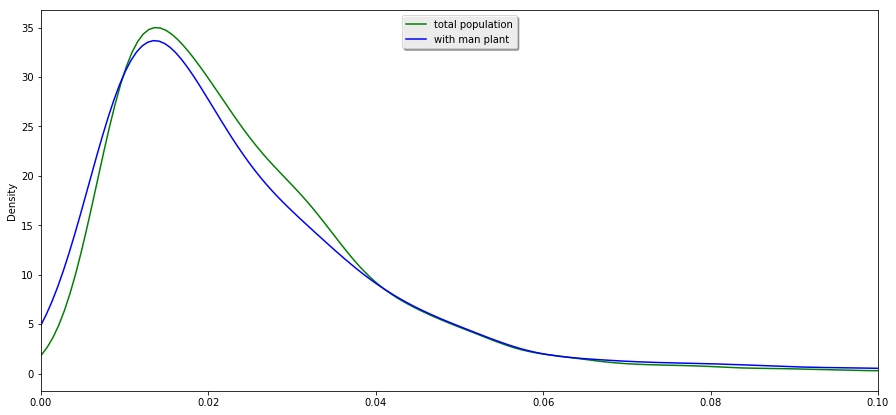

In [42]:
fig, ax = plt.subplots(1,1)
crimes_and_residents['ratio'].plot.density(figsize=(15,7), color='green', label="total population").set_xlim((0,max_x))
crimes_and_residents_with_plants['ratio'].plot.density(figsize=(15,7), color='blue', label="with man plant").set_xlim((0,max_x))
legend = ax.legend(loc='upper center', shadow=True)
fig.show()

### Histogram comparison

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


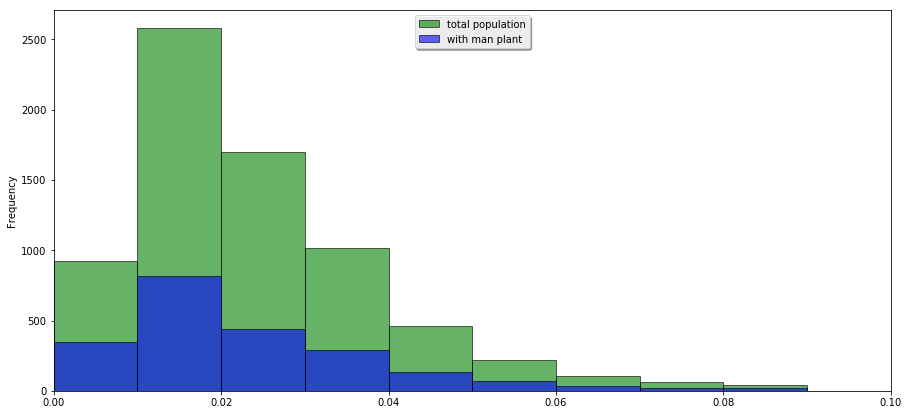

In [16]:
fig, ax = plt.subplots(1,1)
crimes_and_residents['ratio'].plot.hist(figsize=(15,7), alpha=0.6, label='total population', by='ratio', bins=np.arange(0, max_x, 0.01), color='green', edgecolor="k").set_xlim((0,max_x))
crimes_and_residents_with_plants['ratio'].plot.hist(figsize=(15,7), label='with man plant', alpha=0.6, by='ratio', bins=np.arange(0, max_x, 0.01), color='blue', edgecolor="k").set_xlim((0,max_x))
legend = ax.legend(loc='upper center', shadow=True)
fig.show()

In [33]:
len(crimes_and_residents_with_plants)

2219